# Skill needs by industry

The aim of the OECD Skills for Jobs database is to facilitate better adaptation to changing skill needs by making available a database of skill imbalances indicators that is comparable across countries and regularly updated. The Skill Needs Indicators provide an overview of the shortages and surpluses of skills across countries.


# Education and earnings by field of study

This indicator presents internationally comparable data on education and earnings, by level of tertiary education and fields of study, age and gender as published in OECD Education at a Glance 2022. The term “Field of study“ is used to refer to the different fields of the ISCED 2013 Fields of Education and Training classification (ISCED-F 2013).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import geopandas as gpd
import random


import arff

plt.style.use('ggplot')

In [5]:
sbi = pd.read_csv('S4J2022_NACE_09052023200957557.csv')

In [6]:
sbi.shape

(43400, 9)

In [7]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    43400 non-null  object 
 1   Country     43400 non-null  object 
 2   NACE        43400 non-null  object 
 3   NACE.1      43400 non-null  object 
 4   SKILL       43400 non-null  object 
 5   Skills      43400 non-null  object 
 6   Value       43400 non-null  float64
 7   Flag Codes  0 non-null      float64
 8   Flags       0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 3.0+ MB


In [8]:
sbi.head()

,LOCATION,Country,NACE,NACE.1,SKILL,Skills,Value,Flag Codes,Flags
0,AUS,Australia,A,"Agriculture, Forestry and Fishing",01-1,fine arts,-0.008,NaN,NaN
1,AUS,Australia,A,"Agriculture, Forestry and Fishing",01-2,history and archaeology,-0.026,NaN,NaN
2,AUS,Australia,A,"Agriculture, Forestry and Fishing",01-3,philosophy and theology,-0.042,NaN,NaN
3,AUS,Australia,A,"Agriculture, Forestry and Fishing",01,arts and humanities knowledge,-0.015,NaN,NaN
4,AUS,Australia,A,"Agriculture, Forestry and Fishing",02-1,adaptability/resilience,-0.023,NaN,NaN


In [9]:
sbi.isnull().sum()

LOCATION          0
Country           0
NACE              0
NACE.1            0
SKILL             0
Skills            0
Value             0
Flag Codes    43400
Flags         43400
dtype: int64

In [10]:
sbi.drop(columns=['LOCATION', 'NACE', 'Flag Codes','Flags'], axis = 1, inplace = True)

In [11]:
sbi.isnull().sum()

Country    0
NACE.1     0
SKILL      0
Skills     0
Value      0
dtype: int64

In [12]:
sbi['Country'].nunique()

35

In [13]:
sbi.head()

,Country,NACE.1,SKILL,Skills,Value
0,Australia,"Agriculture, Forestry and Fishing",01-1,fine arts,-0.008
1,Australia,"Agriculture, Forestry and Fishing",01-2,history and archaeology,-0.026
2,Australia,"Agriculture, Forestry and Fishing",01-3,philosophy and theology,-0.042
3,Australia,"Agriculture, Forestry and Fishing",01,arts and humanities knowledge,-0.015
4,Australia,"Agriculture, Forestry and Fishing",02-1,adaptability/resilience,-0.023


In [14]:
eef = pd.read_csv('EAG_EARNINGS_FIELD_09052023202237331.csv')

In [15]:
eef.shape

(44928, 21)

In [16]:
eef.columns

Index(['COUNTRY', 'Country', 'ISC11A', 'ISC11A.1', 'SEX', 'Gender', 'AGE',
       'Age', 'EARN_CATEGORY', 'EARN_CATEGORY.1', 'FIELD', 'Field of study',
       'INDICATOR', 'Indicator', 'MEASURE', 'Measure', 'YEAR', 'Year', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [17]:
eef.head()

,COUNTRY,Country,ISC11A,ISC11A.1,SEX,Gender,AGE,Age,EARN_CATEGORY,EARN_CATEGORY.1,...,Field of study,INDICATOR,Indicator,MEASURE,Measure,YEAR,Year,Value,Flag Codes,Flags
0,FIN,Finland,L6,Bachelor’s or equivalent education,F,Women,Y35T44,35-44 years,FTFY_EARNERS,"Full-time, full-year earners",...,Information communication technologies (ICTs),EARN_REL_ISC3OR3T4_DBF,Relative earnings - ISCED 3 = 100 or ISCED 3+4...,VALUE,Value,2019,2019,NaN,m; b,Missing data; Series break
1,DNK,Denmark,L6,Bachelor’s or equivalent education,T,Total,Y35T44,35-44 years,ALL_EARNERS,All earners,...,Arts,EARN_REL_ISC3OR3T4_DBF,Relative earnings - ISCED 3 = 100 or ISCED 3+4...,VALUE,Value,2020,2020,NaN,m,Missing data
2,LVA,Latvia,L5,Short-cycle tertiary education,T,Total,Y25T34,25-34 years,FTFY_EARNERS,"Full-time, full-year earners",...,Health (Nursing and associate health fields),EARN_REL_FIELD,Relative earnings - all fields = 100,VALUE,Value,2020,2020,NaN,c,Data below the publication limit
3,LVA,Latvia,L5,Short-cycle tertiary education,T,Total,Y25T34,25-34 years,PTPY_EARNERS,Part-time or part-year earners,...,Health (Medical & Dental),EARN_REL_FIELD,Relative earnings - all fields = 100,VALUE,Value,2020,2020,NaN,c,Data below the publication limit
4,G20,G20,L7T8,"Master’s, Doctoral or equivalent education",M,Men,Y25T64,25-64 years,FTFY_EARNERS,"Full-time, full-year earners",...,Information communication technologies (ICTs),EARN_REL_FIELD,Relative earnings - all fields = 100,VALUE,Value,2020,2020,NaN,m,Missing data


In [18]:
eef.drop(columns=['COUNTRY', 'ISC11A', 'SEX', 'AGE', 'EARN_CATEGORY', 'FIELD',
                  'INDICATOR', 'MEASURE', 'YEAR', 'Flag Codes', 'Flags'], axis = 1, inplace = True)

In [19]:
eef.head()

,Country,ISC11A.1,Gender,Age,EARN_CATEGORY.1,Field of study,Indicator,Measure,Year,Value
0,Finland,Bachelor’s or equivalent education,Women,35-44 years,"Full-time, full-year earners",Information communication technologies (ICTs),Relative earnings - ISCED 3 = 100 or ISCED 3+4...,Value,2019,NaN
1,Denmark,Bachelor’s or equivalent education,Total,35-44 years,All earners,Arts,Relative earnings - ISCED 3 = 100 or ISCED 3+4...,Value,2020,NaN
2,Latvia,Short-cycle tertiary education,Total,25-34 years,"Full-time, full-year earners",Health (Nursing and associate health fields),Relative earnings - all fields = 100,Value,2020,NaN
3,Latvia,Short-cycle tertiary education,Total,25-34 years,Part-time or part-year earners,Health (Medical & Dental),Relative earnings - all fields = 100,Value,2020,NaN
4,G20,"Master’s, Doctoral or equivalent education",Men,25-64 years,"Full-time, full-year earners",Information communication technologies (ICTs),Relative earnings - all fields = 100,Value,2020,NaN


In [21]:
merged_df = pd.merge(sbi, eef, on="Country", how="inner")

In [22]:
merged_df.head()

,Country,NACE.1,SKILL,Skills,Value_x,ISC11A.1,Gender,Age,EARN_CATEGORY.1,Field of study,Indicator,Measure,Year,Value_y
0,Australia,"Agriculture, Forestry and Fishing",01-1,fine arts,-0.008,Short-cycle tertiary education,Total,35-44 years,Total,Humanities (except languages),Relative earnings - men = 100,Value,2020,NaN
1,Australia,"Agriculture, Forestry and Fishing",01-1,fine arts,-0.008,Short-cycle tertiary education,Total,25-64 years,All earners,Arts,Relative earnings - men = 100,Value,2020,NaN
2,Australia,"Agriculture, Forestry and Fishing",01-1,fine arts,-0.008,Bachelor’s or equivalent education,Women,25-64 years,"Full-time, full-year earners",Health and welfare,Relative earnings - all fields = 100,Value,2020,NaN
3,Australia,"Agriculture, Forestry and Fishing",01-1,fine arts,-0.008,Short-cycle tertiary education,Men,35-44 years,"Full-time, full-year earners","Social sciences, journalism and information",Relative earnings - ISCED 3 = 100 or ISCED 3+4...,Value,2020,NaN
4,Australia,"Agriculture, Forestry and Fishing",01-1,fine arts,-0.008,Tertiary education,Total,35-44 years,"Full-time, full-year earners",Education,Relative earnings - men = 100,Value,2020,NaN


In [24]:
merged_df['SKILL'].value_counts()

01-1    399360
10-4    399360
10      399360
10-9    399360
10-8    399360
         ...  
06-6    399360
06      399360
07-1    399360
07-2    399360
14      399360
Name: SKILL, Length: 70, dtype: int64

In [35]:
# Group the dataset by Country and Skill and calculate the total skill need
grouped = merged_df.groupby(["Country", "Skills"], as_index=False).agg({"Value_x": "sum"})

In [37]:
grouped['Skills']

0                            active listening
1                     adaptability/resilience
2               administration and management
3               arts and humanities knowledge
4                                   attitudes
                        ...                  
616                    training and education
617                            transportation
618                                    values
619    web development and cloud technologies
620                                   writing
Name: Skills, Length: 621, dtype: object

In [26]:
merged_df['Country'].nunique()

9

In [28]:
merged_df['Country'].value_counts()

Austria      3144960
Denmark      3144960
Finland      3144960
Germany      3144960
Portugal     3144960
Sweden       3144960
Estonia      3144960
Latvia       3144960
Australia    2795520
Name: Country, dtype: int64

In [29]:
medical = merged_df[merged_df["Skills"]== 'medicine knowledge']

In [30]:
medical['Country'].nunique()

9

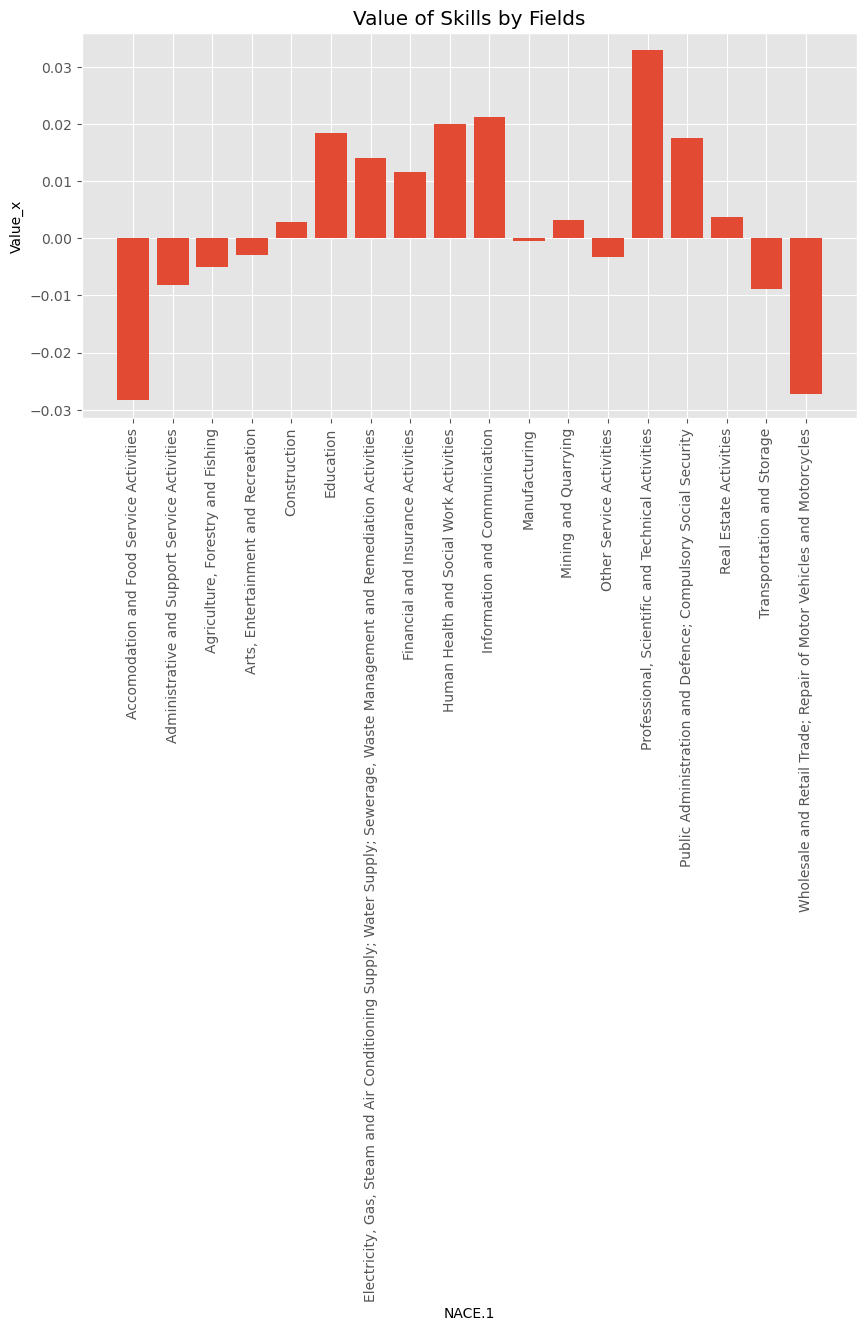

In [31]:
# Calculate the average Value_x for each unique NACE.1
grouped = merged_df.groupby("NACE.1")["Value_x"].mean()

# Create a bar plot of NACE.1 vs Value_x
plt.figure(figsize=(10, 5))
plt.bar(grouped.index, grouped.values)
plt.xlabel("NACE.1")
plt.ylabel("Value_x")
plt.title('Value of Skills by Fields')
plt.xticks(rotation=90)
plt.show()

From the graph, it is obvious that skills that handles professional, scientific and technical activities rank highest in value across industries. And the least ranked ones are in the food services and wholesale and retail trade industries.

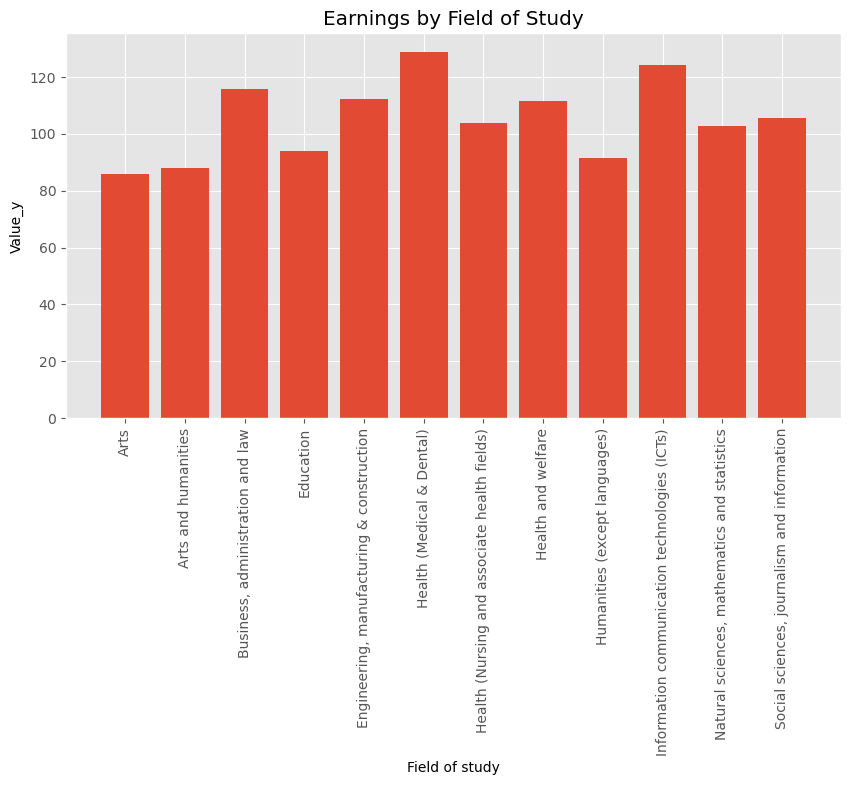

In [32]:
# Calculate the average earning for each unique Field of study
grouped = merged_df.groupby("Field of study")["Value_y"].mean()

# Create a bar plot of Field of study vs Value_x
plt.figure(figsize=(10, 5))
plt.bar(grouped.index, grouped.values)
plt.xlabel("Field of study")
plt.ylabel("Value_y")
plt.title('Earnings by Field of Study')
plt.xticks(rotation=90)
plt.show()

In [33]:
merged_df['Age'].value_counts()

25-64 years    13977600
25-34 years     8064000
35-44 years     5913600
Name: Age, dtype: int64

In [34]:
merged_df['NACE.1'].nunique()

18

In [89]:
merged_sample = merged_df.sample(n=1000 )

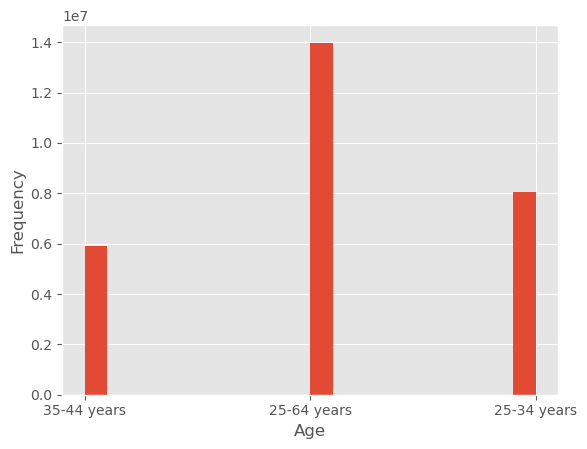

In [97]:
# Create a histogram of 'Age'
plt.hist(merged_df['Age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Ref 

https://stats.oecd.org/Index.aspx?DataSetCode=BLI

https://stats.oecd.org/Index.aspx?DataSetCode=BLI